# Generate Ground Truth Contact Maps

Contact maps is a binary matrix that represent the tertiary structure of a protein in 2D. Each element in the matrix is a binary value, 1 if two given amino acids are in spatially close as defined by a threshold value, 0 if they are not. The distance is between the alpha-carbon atoms (Cα) of the two amino acids, and is measured in angstroms (Å). The standard threshold value used for contact maps is usually 6-12Å. 

Contact maps can be generated in multiple ways: from structural data derived from imperical measurements; from attention maps of a protein language model's attention heads as was done in the ESM models; from the categorical jacobian of a protein language model's logit outputs as was done in the extension for the ESM-2.

To be able to compare how accurate these interpretation methods are for generating contact maps, they need to be compared to ground truth contact maps generated from imperical measurements. As no data set currently exsits of proteins and their contact map, I need to write code to carry out this transformation in order to acquire this data. 

In [1]:
import Bio.PDB
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%run utils.ipynb

In [14]:
# 1. Get location of each alpha-carbon atom at each amino acid residue
def get_ca_atoms(model):
    residues = model.get_residues()
    ca_atoms = np.array([residue['CA'].coord for residue in residues if 'CA' in residue])
    return ca_atoms

# 2. Get the distance between the alpha-carbon atoms of each possible pair of amino acid
def get_distances(ca_atoms):
    # calculate euclidean distance between every possible Cα pairing 
    distances = np.linalg.norm(ca_atoms[:, np.newaxis, :] - ca_atoms[np.newaxis, :, :], axis=-1)
    return distances

# 3. Apply the threshold distance value to generate a binary contact map 
def get_contact_map(distances,cutoff_distance=8):
        contact_map = distances < cutoff_distance
        return contact_map
    
def get_all_contact_maps(models):
    contact_maps = {}
    for protein,model in models.items():
        ca_atoms = get_ca_atoms(model)
        distances = get_distances(ca_atoms)
        contact_map = get_contact_map(distances)
        contact_maps[protein] = distances
    return contact_maps

In [15]:
# parse protein structure data
models = process_pdb_files("protein_structures")
# generate contact maps from structure data
contact_maps = get_all_contact_maps(models)

C:\Users\aguba\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6715.
  warnings.warn(
C:\Users\aguba\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6716.
  warnings.warn(
C:\Users\aguba\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6717.
  warnings.warn(
C:\Users\aguba\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 6718.
  warnings.warn(
C:\Users\aguba\AppData\Local\Programs\Python\Python311\Lib\site-packages\Bio\PDB\StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6719.
  warnings.warn(
C:\Users\aguba\AppData\Lo

In [16]:
def display_contact_map(protein_name):
    contact_map = contact_maps[protein_name]
    plt.matshow(contact_map)
    plt.title(protein_name, fontsize=20)
    plt.show()


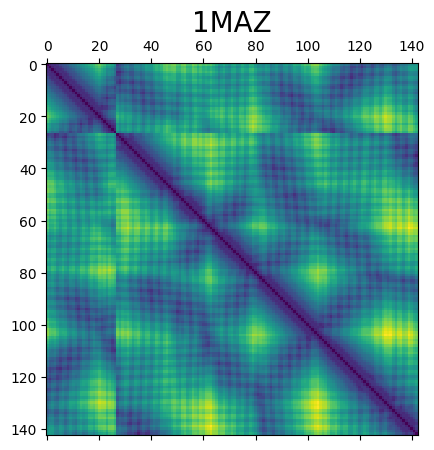

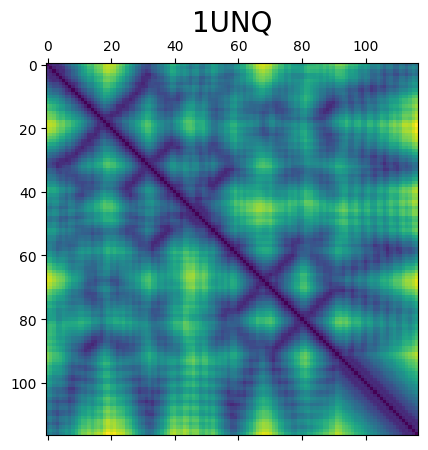

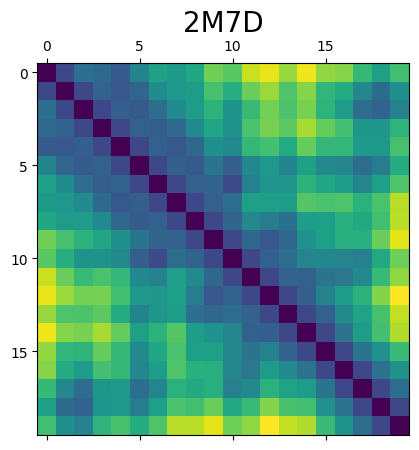

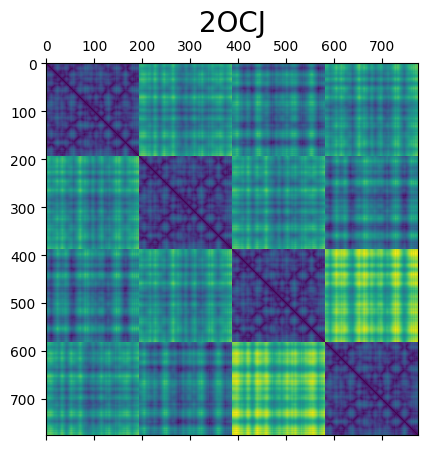

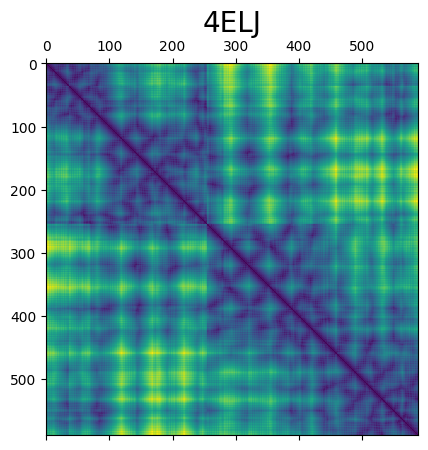

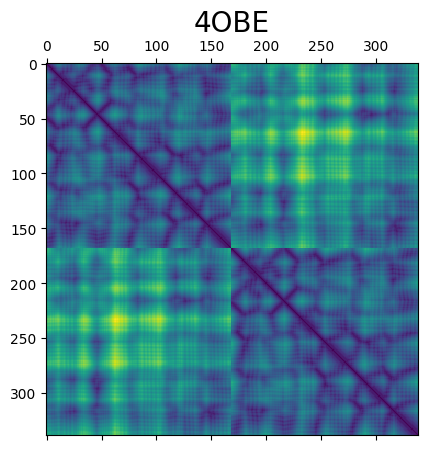

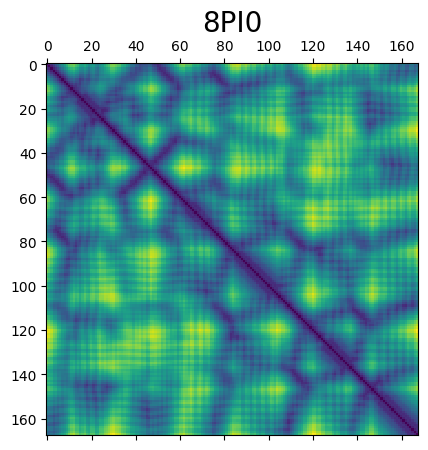

In [19]:
for  protein_name,contact_map in contact_maps.items():
    plt.matshow(contact_maps[protein_name])
    plt.title(protein_name, fontsize=20)
    plt.show()